### Data model correlation between variables

Antes de usar la herramienta PowerBI para visualizar conclusiones que se pueden extraer de la base de datos obtenida, en este notebook se graficará alguna correlación que a simple vista no sea perceptible. PAra ello, y aprovechando el formato del cuestionario de donde se han obtenido los datos y la posterior limpieza, se paran los valores categóricos (respuestas de las preguntas) a valores nominales aplicando one-hot encoding.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('../data/full_data.csv')
df.head()

,Unnamed: 0,date,Latitude,Longitude,Followed_GTOA_Protocol,Interaction_time,Boat_Type,Boat_Length,Towing_Inflatable,Trailing_Fishing_Lure,Physical_Contact_With_Boat,Number_of_Adult_Orcas,Number_of_Juvenile_Orcas,Number_of_Uncertain_Age_Orcas,Rudder,Motoring_or_Sailing,Speed_Knots,Sea_State,Wind_Speed_Beaufort,Daylight_or_Darkness,Cloud_Cover,Distance_Off_Land_NM,Depth_Meters,Depth_Gauge,Autopilot,Hull_Topsides_Color,Antifoul_Color,Boat_Damaged,Tow_Required,Crew_Response,Orcas_Behaviour
0,0,2023-11-01 22:15:00,32.791633,-9.906633,No,0-10,Sail,10-12.5,No,No,No,1,0,0,Spade,Sailing,5 - 7,Moderate,5 - 6 (17 - 27 knots),Night,0 - 25%,Over 10,200m+,On,On,White/light,Blue,No,No,"Orca interaction at 10:15pm on 01/11, 40 miles...",I would describe the behaviour of the Orca dur...
1,1,2023-10-31 07:50:00,39.433333,-9.383333,Yes,0-10,Sail,12.5-15,No,No,Yes,2,5,0,Twin rudder,Motoring,5 - 7,Rough,3 - 4 (7 - 16 knots),Day,50 - 75%,2 - 5,40 - 200m,On,On,White/light,Black,"Yes, moderate - immediate repairs required",No,We had sandbags on our sugar scoops and metal ...,Juveniles hitting the rudders adults close by
2,2,2023-09-19 11:00:00,37.666667,-8.900000,No,0-10,Sail,12.5-15,No,No,Yes,1,0,0,Spade,Motoring,5 - 7,Calm,3 - 4 (7 - 16 knots),Day,0 - 25%,2 - 5,40 - 200m,On,On,White/light,Other,"Yes, moderate - immediate repairs required",No,We saw the orca approach from 10 o’clock posit...,There was an initial approach 45 minutes earli...
3,3,2023-09-01 13:15:00,45.600000,-3.750000,Yes,10-30,Sail,15+,No,Yes,Yes,1,2,0,Spade,Sailing,3 - 4,Calm,3 - 4 (7 - 16 knots),Day,25 - 50%,Over 10,200m+,Off,Off,White/light,Black,"Yes, moderate - immediate repairs required",No,Les trois orques passent constamment de bâbord...,Pas de comportement visblement agressif./// No...
4,4,2023-09-02 03:45:00,42.750000,-9.233333,Yes,0-10,Sail,12.5-15,No,No,Yes,1,2,0,Spade,Motorsailing,5 - 7,Calm,0 - 2 (0 - 6 knots),Night,0 - 25%,5 - 10,40 - 200m,On,On,White/light,Black,"Yes, moderate - immediate repairs required",Yes,Arrêt du pilote automatique a la 2 eme interac...,Approche furtive à la première interaction dir...


### One hot Encoding

Vamos a proceder a hacer el one hot encoding. Como se comenta previamente, ya que el cuestionario llevado a cabo por los patrones de las embarcaciones era de opciones y únicamente dos preguntas eran de respuesta libre, tenemos pocos valores únicos en cada columna, donde cada columna representa una pregunta del formulario. De todas las columnas, no tendremos en cuenta ni el índice de cada fila, ni a la fecha por tener más de un año entre manos, ni Crew_Response ni Orcas_Behaviour. Del resto de columnas, no habría que aplicar el one hot encoding a aquellas columnas que ya son numéricas: ['Latitude', 'Longitude', 'Number_of_Adult_Orcas', 'Number_of_Juvenile_Orcas', 'Number_of_Uncertain_Age_Orcas'].

Un detalle importante sería no tener en cuenta aquellas columnas que terminen por `unknown`, ya que son aquellas preguntas del cuestionario que no tuvieron respuesta y, por no perder la fila entera se rellenaron con esta palabra. A la hora de tener en cuenta la matriz de correlación no se tendrán en cuenta.

In [23]:
# Seleccionamos las columnas para la correlación
numerical_columns = ['Latitude', 'Longitude', 'Number_of_Adult_Orcas', 'Number_of_Juvenile_Orcas', 'Number_of_Uncertain_Age_Orcas']

# Convertimos columnas categoricas en dummies
categorical_columns = ['Followed_GTOA_Protocol', 'Interaction_time', 'Boat_Type', 'Boat_Length', 'Towing_Inflatable',
                        'Trailing_Fishing_Lure', 'Physical_Contact_With_Boat', 'Rudder', 'Motoring_or_Sailing',
                        'Speed_Knots', 'Sea_State', 'Wind_Speed_Beaufort', 'Daylight_or_Darkness', 'Cloud_Cover',
                        'Distance_Off_Land_NM', 'Depth_Meters', 'Depth_Gauge', 'Autopilot', 'Hull_Topsides_Color',
                        'Antifoul_Color', 'Boat_Damaged', 'Tow_Required']

df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)

# Filtramos aquellas columnas que terminen en Unknown ya que no aportan nada al estudio
df_encoded = df_encoded.loc[:, ~df_encoded.columns.str.endswith('Unknown')]

# Pasamos a 1's y 0's en vez de Trues y Falses
df_encoded = df_encoded.astype(int)

# Combinamos las variables numéricas y las recién convertidas en dummies
df_combined = pd.concat([df[numerical_columns], df_encoded], axis=1)

# Comprobamos la correlación
correlation_matrix = df_combined.corr()


In [24]:
df_encoded.head()

,Followed_GTOA_Protocol_Yes,Interaction_time_10-30,Interaction_time_30-60,Interaction_time_60+,Boat_Type_Motor,Boat_Type_Sail,Boat_Length_10-12.5,Boat_Length_12.5-15,Boat_Length_15+,Towing_Inflatable_Yes,Trailing_Fishing_Lure_Yes,Physical_Contact_With_Boat_Yes,Rudder_Keel hung,Rudder_Semi skeg,Rudder_Spade,Rudder_Twin rudder,Motoring_or_Sailing_Motoring,Motoring_or_Sailing_Motorsailing,Motoring_or_Sailing_Sailing,Speed_Knots_3 - 4,Speed_Knots_5 - 7,Speed_Knots_8 - 11,Sea_State_Moderate,Sea_State_Rough,Wind_Speed_Beaufort_3 - 4 (7 - 16 knots),Wind_Speed_Beaufort_5 - 6 (17 - 27 knots),Wind_Speed_Beaufort_7+ (28 knots+),Daylight_or_Darkness_Day,Daylight_or_Darkness_Dusk,Daylight_or_Darkness_Night,Cloud_Cover_25 - 50%,Cloud_Cover_50 - 75%,Cloud_Cover_75 - 100%,Distance_Off_Land_NM_2 - 5,Distance_Off_Land_NM_5 - 10,Distance_Off_Land_NM_Over 10,Depth_Meters_200m+,Depth_Meters_40 - 200m,Depth_Meters_Up to 20m,Depth_Gauge_On,Autopilot_On,Hull_Topsides_Color_White/light,Antifoul_Color_Blue,Antifoul_Color_Coppercoat,Antifoul_Color_Green,Antifoul_Color_Other,Antifoul_Color_Red,Antifoul_Color_White,"Boat_Damaged_Yes, extensive - major works required","Boat_Damaged_Yes, minor - will wait until the end of the season","Boat_Damaged_Yes, moderate - immediate repairs required",Tow_Required_Yes
0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1


In [25]:
df_encoded.shape

(153, 52)

In [15]:
# Pasamos de tener 30 columnas a tener 52, con 1's y 0's para representar cuando se da cada valor y cuando no. El número de filas se mantiene, seguimos teniendo el mismo número de casos.

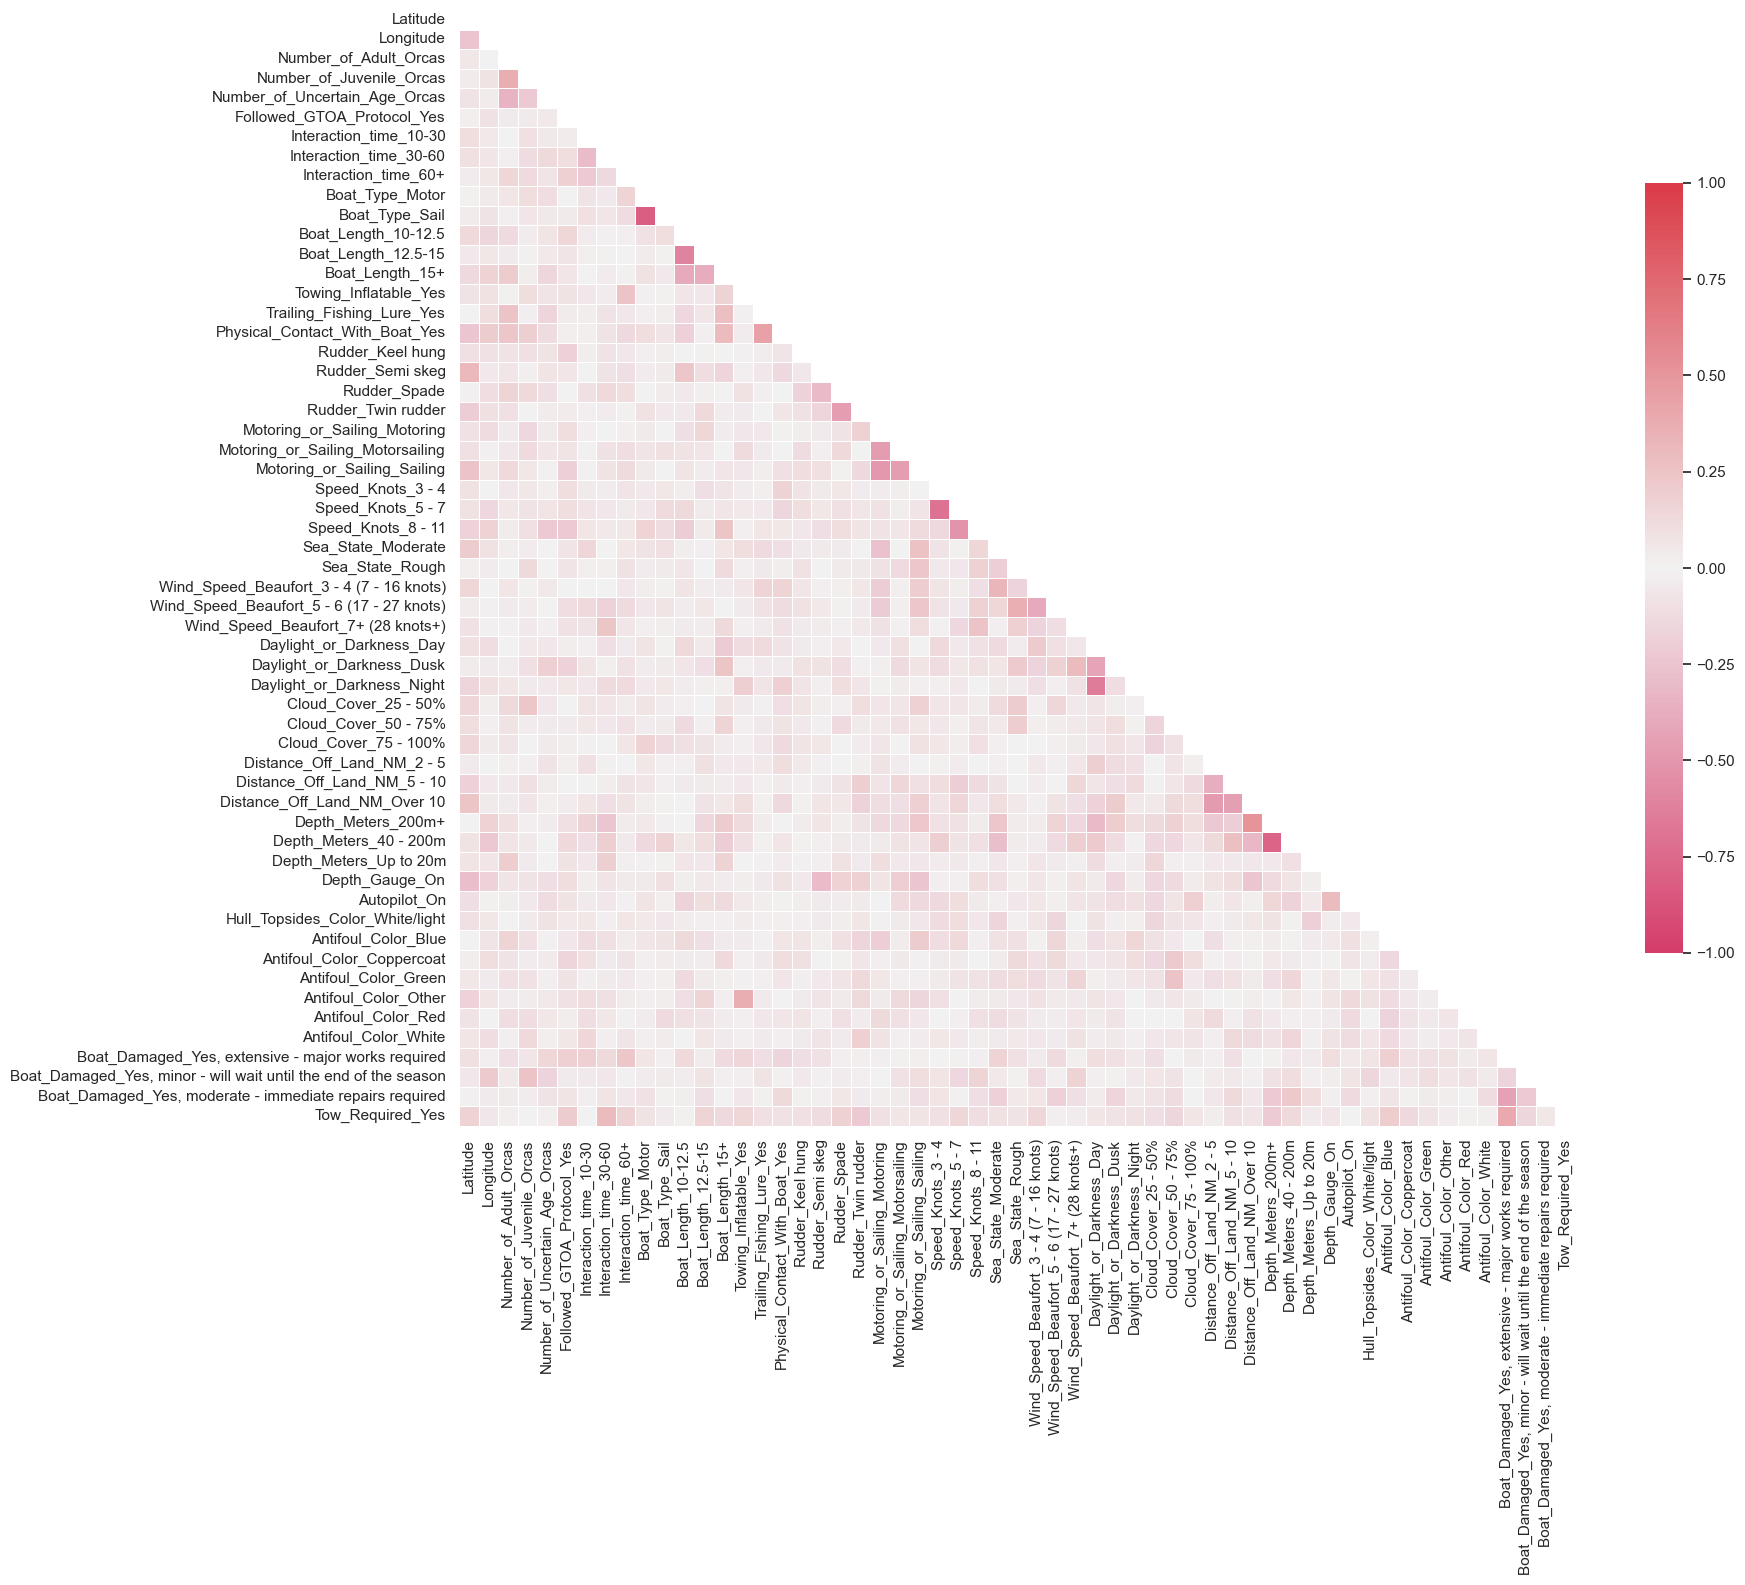

In [26]:
sns.set(style='white')     # estilo blanco

mascara = np.triu(np.ones_like(correlation_matrix, dtype=bool))   # mascara

cmap = sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores

plt.figure(figsize=(18, 20))  # Ajustamos tamaño según se necesite

sns.heatmap(correlation_matrix,          # datos
            mask=mascara,                # mascara
            cmap=cmap,                   # paleta de colores
            vmax=1,                      # maximo vertical
            vmin=-1,                     # minimo vertical
            center=0,                    # centro
            square=True,                 # cuadrado el dato pintado
            linewidth=0.5,               # ancho de la linea
            cbar_kws={'shrink': 0.5},    # barra de color
            annot=False                  # anotacion, el numero escrito
           )

plt.show()

Una vez plotteado en un mapa de calor, procedo a analizar las posibles correlaciones que se puedan inferir del mapa, destacando las siguientes:
* Se ve una ligera relación entre la profundidad de las aguas donde se dio el ataque y el tiempo de interacción entre 30 y 60 minutos.
* Existe una pequeña correlación entre barcos de más de 15m de eslora y condiciones meteorologicas adversas.Esto se puede explicar ya que a mayores dimensiones de barco, se espera una mayor resistencia y menor adversidad frente a mayor oleaje. Si hay más barcos de mayores dimensiones en el agua, es entendible que tengan más interacciones con cetáceos.
* Existe una pequeña relación tambien entre el número de orcas adultas vistas y aquellos barcos que se encontraban arrastrando un señuelo pescando. Quizás esto se deba a que sean las orcas adultas las que lideran la pesca entre sus grupos.
* También existe una relación entre aquellas orcas que tocaron físicamente los barcos y el número de orcas adultas y juveniles, siendo estas las que formulan los ataques en la mayoría de ocasiones.
* También, aunque poco pronunciada, se puede ver una correlación entre los ataques que sucedieron de noche con los barcos que afirmaron estar remolcando una neumática. Si esto realmente fuera así, se podría recomendar a las tripulaciones recoger las neumáticas y subirlas a bordo por las noches. 
* Comparando los tres rangos de velocidad de las embarcaciones se ve una mayor correlación con el resto de columnas a medida que aumenta la velocidad. Puede ser por esta razon que desde salvamento marítimo y GTOA se recomiende a las embarcaciones arriar las velas y apagar los motores. A menores velocidades las orcas tienden a desinterearse más rápido y provocar menos y menos aparatosos destrozos.